In [1]:
from __future__ import division
import json 
import numpy as np 
from collections import defaultdict

#matplotlib inline for jupyter notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# train proportions

In [3]:
x_train_proportions = np.arange(0.1, 1.0, 0.1)

In [4]:
#load in the results 
model2prop2mae = json.load(open('../code/eval/trainprop_forgraphs/model2prop2mae.json', 'r'))
model2prop2ci = json.load(open('../code/eval/trainprop_forgraphs/model2prop2ci', 'r'))

In [5]:
#get means
model2mae_mean = defaultdict(list)
model2ci_mean = defaultdict(list)

for model in model2prop2mae.keys():
    print model 
    for prop in [str(int(10*xx)) for xx in x_train_proportions]:
        model2mae_mean[model].append(np.mean(np.array(model2prop2mae[model][prop])))
        model2ci_mean[model].append(np.mean(np.array(model2prop2ci[model][prop])))

pcc
hybrid


In [6]:
print len(model2mae_mean['pcc'])

9


In [7]:
def plot_mae(plt):
    for prop in x_train_proportions:
        pcc = plt.scatter(np.ones(10)*prop, model2prop2mae['pcc'][str(int(10*prop))], c='r', marker='x', label='PB-PCC', s=75)
        impl = plt.scatter(np.ones(10)*prop, model2prop2mae['hybrid'][str(int(10*prop))], c='b', label='LR-Implicit', s=75)
    plt.plot(x_train_proportions, model2mae_mean['pcc'], c='r')
    plt.plot(x_train_proportions, model2mae_mean['hybrid'], c='b')
    plt.xlabel('Training synthetic prevalence', fontsize=40)
    plt.ylabel('MAE', fontsize=40)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.legend(handles=[pcc, impl], fontsize=30)
    return plt 

In [8]:
def plot_ci(plt):
    for prop in x_train_proportions:
        pcc = plt.scatter(np.ones(10)*prop, model2prop2ci['pcc'][str(int(10*prop))], c='r', marker='x',  s=75)
        impl = plt.scatter(np.ones(10)*prop, model2prop2ci['hybrid'][str(int(10*prop))], c='b',  s=75)
    plt.plot(x_train_proportions, model2ci_mean['pcc'], c='r')
    plt.plot(x_train_proportions, model2ci_mean['hybrid'], c='b')
    plt.xlabel('Training synthetic prevalence', fontsize=40)
    plt.ylabel('CI coverage', fontsize=40)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return plt 

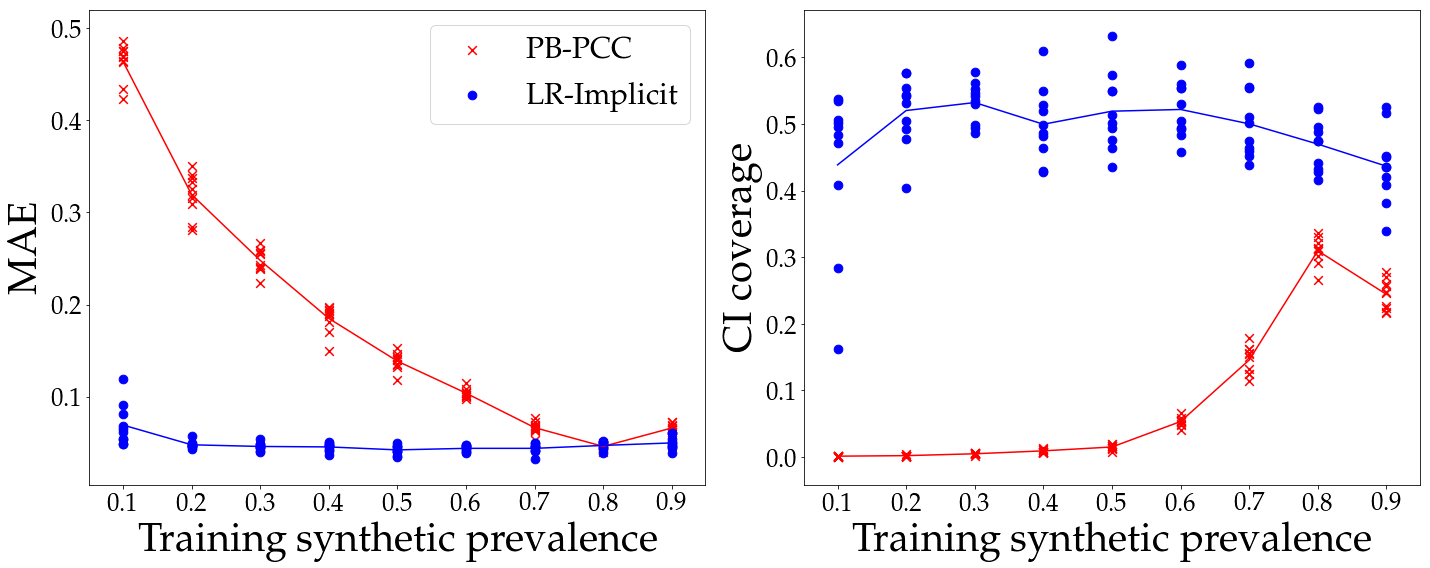

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt = plot_mae(plt)
plt.subplot(122)
plt = plot_ci(plt)
plt.tight_layout()
plt.savefig('../writing/figs/train_prop.png', bbox_inches='tight')
plt.show()